In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            roc_auc_score, roc_curve, auc, precision_recall_curve,
                            confusion_matrix)
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf


%matplotlib inline


2023-06-10 12:21:25.669648: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-10 12:21:26.163847: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-10 12:21:34.636256: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<hr>
Open dataset
<hr>

In [2]:
df_patients = pd.read_csv('../datasets/dataset_preprocessed.csv')

In [3]:
df_patients.head(10)

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_encoded,gender_encoded,icu_type_encoded,apache_3j_bodysystem_encoded,apache_2_bodysystem_encoded
0,0.0,68.0,22.730000,0.0,180.3,0.541667,73.9,113.0,502.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,9.0,0.0
1,0.0,77.0,27.420000,0.0,160.0,0.927778,70.2,108.0,203.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,8.0,6.0
2,0.0,25.0,31.950000,0.0,172.7,0.000694,95.3,122.0,703.03,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,5.0,3.0
3,0.0,81.0,22.640000,1.0,165.1,0.000694,61.7,203.0,1206.03,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
4,0.0,67.0,27.560000,0.0,190.5,0.000694,100.0,301.0,403.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,7.0,4.0
5,0.0,59.0,57.450000,0.0,165.1,0.000694,156.6,108.0,203.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,8.0,6.0
6,0.0,50.0,25.710000,0.0,175.3,0.060417,79.0,112.0,107.01,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0
7,0.0,72.0,28.257052,1.0,154.9,0.004861,67.8,303.0,1304.08,1.0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,5.0,8.0,6.0
8,0.0,80.0,27.382812,1.0,160.0,1.271528,70.1,218.0,1505.02,1.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,5.0,7.0,4.0
9,0.0,81.0,38.189067,1.0,172.7,1.376389,113.9,303.0,1304.05,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,8.0,6.0


<hr>
Modelling
<hr>

In [4]:
#prepare the dataset, split into X and y datasets and then split them again into trains and test
X = df_patients.drop(['hospital_death'], axis=1)
y = df_patients['hospital_death']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=11, stratify = y)

In [6]:
#let's see how split the datasets are
print ('Split Datasets')
print ('==============')
print(f'1. X_train :{X_train.shape}')
print(f'2. y_train :{y_train.shape}')
print(f'1. X_test :{X_test.shape}')
print(f'2. y_test :{y_test.shape}')

Split Datasets
1. X_train :(61784, 103)
2. y_train :(61784,)
1. X_test :(26480, 103)
2. y_test :(26480,)


<P>Modelling the Neural Network</p>
<hr>
<p> 103 inputs, because is the size of the data set</p>
<p>due the result is binary, the output is set in 1</p>

In [7]:
# Neural network
#
nn_model = Sequential()
nn_model.add(Dense(260, input_dim=103, activation='relu'))
nn_model.add(Dense(520, activation='relu'))
nn_model.add(Dense(260, activation='relu'))
nn_model.add(Dense(130, activation='relu'))
nn_model.add(Dense(65, activation='relu'))
nn_model.add(Dense(1,activation='sigmoid'))

In [8]:
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs. That's why the using of <b>validation_data</b> tuple in the parameters of model.fit method

In [9]:
##Time to train!!
history = nn_model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=50, batch_size=64)

Epoch 1/50
966/966 [==============================] - 15s 13ms/step - loss: 0.3243 - accuracy: 0.9118 - val_loss: 0.2335 - val_accuracy: 0.9197
Epoch 2/50
966/966 [==============================] - 13s 13ms/step - loss: 0.2368 - accuracy: 0.9181 - val_loss: 0.2254 - val_accuracy: 0.9188
Epoch 3/50
966/966 [==============================] - 13s 13ms/step - loss: 0.2257 - accuracy: 0.9208 - val_loss: 0.2275 - val_accuracy: 0.9209
Epoch 4/50
966/966 [==============================] - 12s 13ms/step - loss: 0.2209 - accuracy: 0.9212 - val_loss: 0.2135 - val_accuracy: 0.9218
Epoch 5/50
966/966 [==============================] - 13s 14ms/step - loss: 0.2187 - accuracy: 0.9214 - val_loss: 0.2121 - val_accuracy: 0.9225
Epoch 6/50
966/966 [==============================] - 13s 13ms/step - loss: 0.2153 - accuracy: 0.9223 - val_loss: 0.2121 - val_accuracy: 0.9231
Epoch 7/50
966/966 [==============================] - 14s 14ms/step - loss: 0.2141 - accuracy: 0.9226 - val_loss: 0.2183 - val_accuracy:

history variable keeps values of every iteration, so let's visualize accuracy an losses

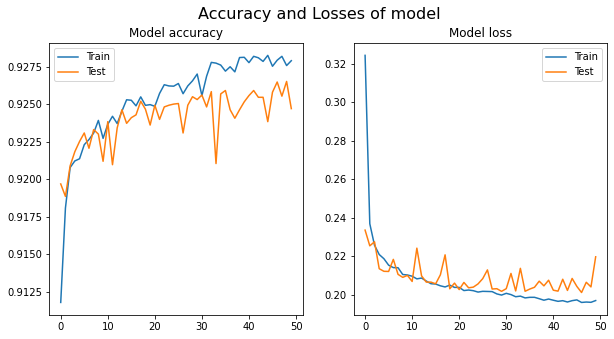

In [28]:
#plot
#ploting accuracy
figure, (axis1,axis2) = plt.subplots(1, 2,figsize=(10, 5))
figure.suptitle("Accuracy and Losses of model", fontsize=16)
axis1.plot(history.history['accuracy'])
axis1.plot(history.history['val_accuracy'])
axis1.title.set_text('Model accuracy')
axis1.title.set_y('Accuracy')
#axis1.title.set_x('Epoch')
axis1.legend(['Train', 'Test'], loc='upper left')

#ploting losses
axis2.plot(history.history['loss'])
axis2.plot(history.history['val_loss'])
axis2.title.set_text('Model loss')
axis2.title.set_y('Loss')
#axis2.title.set_x('Epoch')
axis2.legend(['Train', 'Test'], loc='upper right')

#show the graph

plt.show()

In [29]:
#predicting
y_pred = nn_model.predict(X_test)

828/828 [==============================] - 10s 5ms/step


<p>So far, the model looks fine, let's continue to score it. To assess how well a model fits a dataset, we can look at the following two metrics:</p>
<ul>
    <li>Sensitivity: The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. This is also called the “true positive rate.”</li>
    <li>Specificity: The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. This is also called the “true negative rate.”</li>
</ul>
<p>One way to visualize these two metrics is by creating a ROC curve, which stands for “receiver operating characteristic” curve.</p>

<p>This is a plot that displays the sensitivity along the y-axis and (1 – specificity) along the x-axis.</p>

<p>One way to quantify how well the logistic regression model does at classifying data is to calculate AUC, which stands for “area under curve.”</p>

<P>The closer the AUC is to 1, the better the model is.</p>

In [36]:
#Calculate de AUC
auc = roc_auc_score(y_test, y_pred)
print('Final Model Score')
print('=================')
print(f'AUC Score : {auc}')

Final Model Score
AUC Score : 0.873640839628269


In [34]:
#calculate roc
falsePositiveRate, truePositiveRate, threathold = roc_curve(y_test, y_pred)

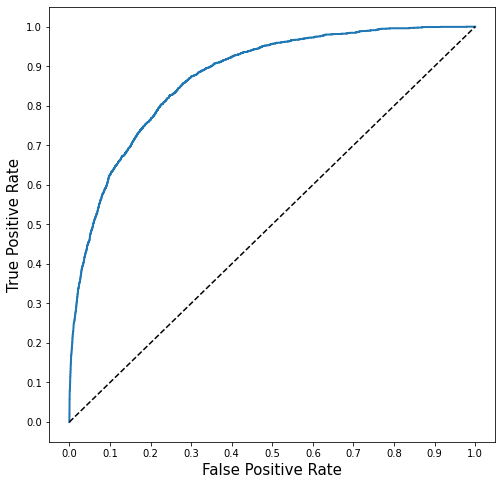

In [35]:
#let's plot the 
fig, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate, truePositiveRate, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel("False Positive Rate", fontsize = 15)
ax.set_ylabel("True Positive Rate", fontsize = 15)
ax.set_xticks(np.linspace(0, 1, 11));
ax.set_yticks(np.linspace(0, 1, 11));

<hr>
Tuning Parameters
<hr>